<img src="escudo_utfsm.gif" style="float:right;height:100px">
<img src="IsotipoDIisocolor.png" style="float:left;height:100px">
<center>
    <h1> Taller 2: Estudio Comparativo de Clasificadores con Python </h1>
    <h1> Sebastián Acevedo /  </h1>
    <h1> Sebastián Sánchez / 201504022-2 </h1>
    <h2> Fecha: Junio 2019 </h2>
</center>    

---
## Librerías y modulos

In [35]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns

## Descripción de conjunto de datos

In [5]:
# Leer datos
data = pd.read_csv("bank-additional.csv",sep=";") 
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


Estos datos están relacionados con campañas de marketing telefónico de un banco portugués. El objetivo de clasificación es predecir si el cliente se suscribirá al servicio ofrecido por el banco.

### Descripción de los datos
|Atributo           |Descripcion
|-----------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| age             | edad (numérico)    
| job             | trabajo (categórico: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') |
| marital         | estado civil: (categórico: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)                                                         |
| education       | educación (categórico: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')                                 |
| default         | si tiene un credito normal (categórico: 'no','yes','unknown')                                                                                                           |
| housing         | si tiene una deuda hipotecaria (categórico: 'no','yes','unknown')                                                                                                       |
| loan            | si tiene una deuda personal (categórico: 'no','yes','unknown')                                                                                                          |
| contact         | tipo de comunicación (categorico: 'cellular','telephone')                                                                                                               |
| mes             | mes de la llamada (categorico: 'jan', 'feb', 'mar', ..., 'nov', 'dec')                                                                                                  |
| day_of_the_week | dia de la llamada (categorico: 'mon','tue','wed','thu','fri')                                                                                                           |
| duration        | duración de la llamada (numerico)                                                                                                                                       |
| campaign        | numero de llamadas (numerico)                                                                                                                                           |
| pdays           | dias entre llamadas (numerico)                                                                                                                                          |
| previous        | numero de llamadas de campañas anteriores (numerico)                                                                                                                    |
| poutcome        | resultado de las campañas anteriores (categorico: 'failure','nonexistent','success')                                                                                    |
| emp.var.rate    | indicador de empleabilidad (numerico)                                                                                                                                   |
| cons.price.idx  | indice de precio de consumo (numerico)                                                                                                                                  |
| cons.cof.idx    | indice de confianza de consumo (numerico)                                                                                                                               |
| euribor3m       | indice de euribor (numerico)                                                                                                                                            |
| nr.employees    | numero de empleos (numerico)                                                                                                                                            |
| y               | variable output, si el cliente se suscribe o no (binary: 'yes','no')                                                                                                    |

---
## Discretización de datos categóricos y conjuntos de entrenamiento / testing 


In [36]:
# Transformar datos categóricos

enc=OrdinalEncoder()
enc.fit(data)
OrdinalEncoder(categories='auto')
data=enc.transform(data)

In [37]:
# Dividir datos en entrenamiento y testeo
y = data[:,-1]
X = data[:,:-1]
X_entrenamiento, X_test, y_entrenamiento, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [97]:
class Desempeño_Matriz_Curva:
    
    # Esta clase contiene los métodos
    # necesarios para obtener
    # el desempeño del clasificador,
    # la matriz de confusión
    # y la curva ROC y su área AUC.
    
    
    # Recibe un clasificador
    def prediccion(self, clsfr):
        clsfr.fit(X_entrenamiento, y_entrenamiento)
        
        # Retorna prediccion
        return clsfr.predict(X_test)
    
    # Recibe prediccion
    def desempeño(self, y_pred):
        
        # El recall de la clase positiva es sensitivity
        # El recall de la clase negativa es specificity
        target_names = ['no', 'yes']
        report = ["Accuracy: "+str(accuracy_score(y_test, y_pred))
                  , "Error: " + str(1-accuracy_score(y_test, y_pred))
                  , classification_report(y_test, y_pred, target_names=target_names)                
                 ]
        
        # Retorna reporte de desempeño
        return report
    
    # Recibe prediccion
    def confusion_mtrx(self, y_pred):
        
        conf_map = confusion_matrix(y_test, y_pred), sns.heatmap(confusion_matrix(y_test, y_pred))
        
        # Retorna matriz y heatmap
        return conf_map
    def AUC_ROC(self, y_pred):
        
        ## Curva ROC (tpr: true positive rates, fpr: false positive rates)
        ## AUC (Area Under Curve)

        fpr, tpr, _ = roc_curve(y_test, y_predKN)

        plt.figure()
        lw = 2
        plt.plot(fpr, tpr, color='darkorange',
                 lw=lw, label='ROC curve')
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
        plt.show()

        print("Area under curve: ", roc_auc_score(y_test, y_predKN))
    
clsfier = Desempeño_Matriz_Curva()

---
## Clasificador K-Nearest Neighbors

In [10]:
neigh = KNeighborsClassifier(n_neighbors=3)
y_predKN = clsfier.prediccion(neigh);

### Desempeño del clasificador

In [28]:
for i in clsfier.desempeño(y_predKN):
    print(i, '\n')

Accuracy: 0.8737864077669902 

Error: 0.12621359223300976 

              precision    recall  f1-score   support

          no       0.93      0.93      0.93      1114
         yes       0.35      0.33      0.34       122

   micro avg       0.87      0.87      0.87      1236
   macro avg       0.64      0.63      0.63      1236
weighted avg       0.87      0.87      0.87      1236
 



### Matriz de confusion

[[1040   74]
 [  82   40]]
AxesSubplot(0.125,0.125;0.62x0.755)


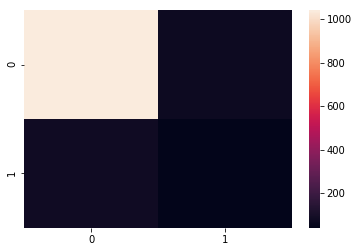

In [98]:
for i in clsfier.confusion_mtrx(y_predKN):
    print(i)

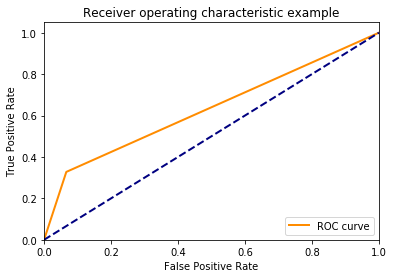

Area under curve:  0.6307207817052711


In [15]:
clsfier.AUC_ROC(y_predKN)

---
## Linear SVM

In [45]:
Lclf = SVC(kernel="linear", C=0.025)
y_predLSVM = clsfier.prediccion(Lclf)

### Desempeño del clasificador

In [46]:
for i in clsfier.desempeño(y_predLSVM):
    print(i, '\n')

Accuracy: 0.912621359223301 

Error: 0.08737864077669899 

              precision    recall  f1-score   support

          no       0.93      0.97      0.95      1114
         yes       0.60      0.35      0.44       122

   micro avg       0.91      0.91      0.91      1236
   macro avg       0.76      0.66      0.70      1236
weighted avg       0.90      0.91      0.90      1236
 



### Matriz de confusion

[[1085   29]
 [  79   43]]
AxesSubplot(0.125,0.125;0.62x0.755)


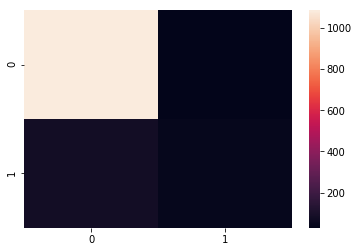

In [47]:
for i in clsfier.confusion_mtrx(y_predLSVM):
    print(i)

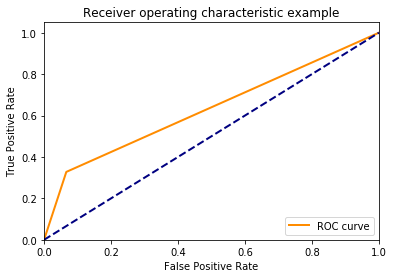

Area under curve:  0.6307207817052711


In [48]:
clsfier.AUC_ROC(y_predLSVM)

---
## RBF SVM

In [50]:
Gclf = SVC(gamma=2, C=1)
y_predLRBF = clsfier.prediccion(Gclf)

### Desempeño del clasificador

In [53]:
for i in clsfier.desempeño(y_predLRBF):
    print(i, '\n')

Accuracy: 0.901294498381877 

Error: 0.09870550161812297 

              precision    recall  f1-score   support

          no       0.90      1.00      0.95      1114
         yes       0.00      0.00      0.00       122

   micro avg       0.90      0.90      0.90      1236
   macro avg       0.45      0.50      0.47      1236
weighted avg       0.81      0.90      0.85      1236
 



### Matriz de confusion

[[1114    0]
 [ 122    0]]
AxesSubplot(0.125,0.125;0.62x0.755)


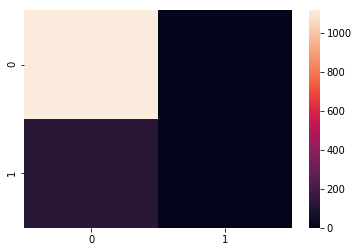

In [60]:
for i in clsfier.confusion_mtrx(y_predLRBF):
    print(i)

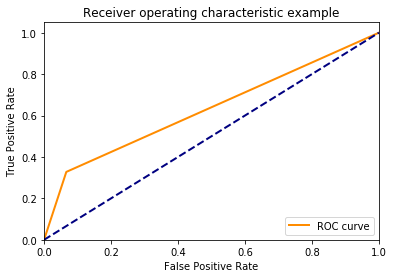

Area under curve:  0.6307207817052711


In [61]:
clsfier.AUC_ROC(y_predLRBF)

---
## Decision Tree

In [62]:
clf_tree = tree.DecisionTreeClassifier(max_depth=5)
y_predTREE = clsfier.prediccion(clf_tree)

### Desempeño del clasificador

In [63]:
for i in clsfier.desempeño(y_predTREE):
    print(i, '\n')

Accuracy: 0.8988673139158576 

Error: 0.10113268608414239 

              precision    recall  f1-score   support

          no       0.93      0.96      0.94      1114
         yes       0.48      0.34      0.40       122

   micro avg       0.90      0.90      0.90      1236
   macro avg       0.71      0.65      0.67      1236
weighted avg       0.89      0.90      0.89      1236
 



### Matriz de confusion

[[1070   44]
 [  81   41]]
AxesSubplot(0.125,0.125;0.62x0.755)


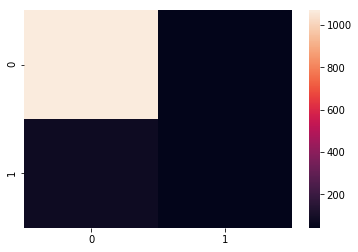

In [64]:
for i in clsfier.confusion_mtrx(y_predTREE):
    print(i)

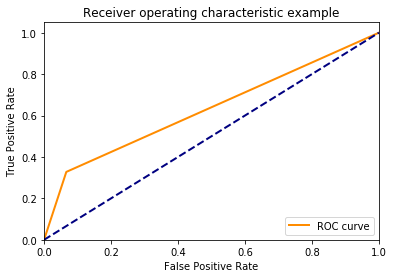

Area under curve:  0.6307207817052711


In [65]:
clsfier.AUC_ROC(y_predTREE)

---
##  Random Forest

In [66]:
rf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
y_predRF = clsfier.prediccion(rf)

### Desempeño del clasificador

In [68]:
for i in clsfier.desempeño(y_predRF):
    print(i, '\n')

Accuracy: 0.9029126213592233 

Error: 0.09708737864077666 

              precision    recall  f1-score   support

          no       0.91      0.99      0.95      1114
         yes       0.54      0.12      0.20       122

   micro avg       0.90      0.90      0.90      1236
   macro avg       0.72      0.56      0.57      1236
weighted avg       0.87      0.90      0.87      1236
 



### Matriz de confusion

[[1101   13]
 [ 107   15]]
AxesSubplot(0.125,0.125;0.62x0.755)


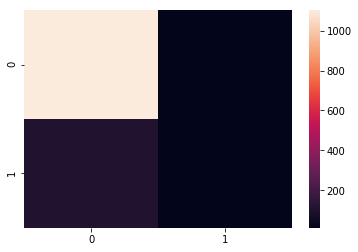

In [69]:
for i in clsfier.confusion_mtrx(y_predRF):
    print(i)

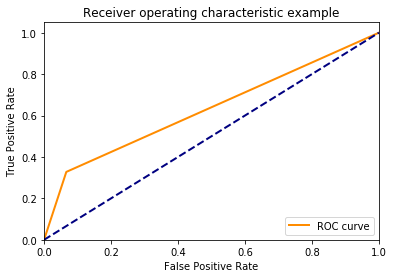

Area under curve:  0.6307207817052711


In [70]:
clsfier.AUC_ROC(y_predRF)

---
##  Neural Net

In [72]:
net = MLPClassifier(alpha=1)
y_predMLP = clsfier.prediccion(net)

### Desempeño del clasificador

In [73]:
for i in clsfier.desempeño(y_predMLP):
    print(i, '\n')

Accuracy: 0.866504854368932 

Error: 0.133495145631068 

              precision    recall  f1-score   support

          no       0.97      0.88      0.92      1114
         yes       0.40      0.71      0.51       122

   micro avg       0.87      0.87      0.87      1236
   macro avg       0.68      0.80      0.72      1236
weighted avg       0.91      0.87      0.88      1236
 



### Matriz de confusion

[[984 130]
 [ 35  87]]
AxesSubplot(0.125,0.125;0.62x0.755)


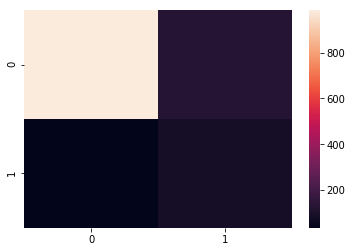

In [76]:
for i in clsfier.confusion_mtrx(y_predMLP):
    print(i)

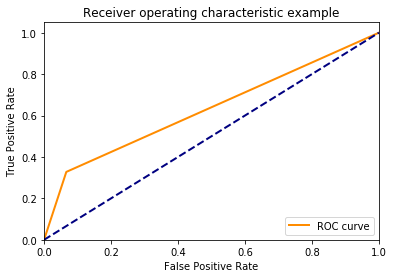

Area under curve:  0.6307207817052711


In [77]:
clsfier.AUC_ROC(y_predMLP)

---
## Clasificador Linear Discriminant Analysis

In [80]:
lda = LinearDiscriminantAnalysis()
y_predLDA = clsfier.prediccion(lda)

### Desempeño del clasificador

In [81]:
for i in clsfier.desempeño(y_predLDA):
    print(i, '\n')

Accuracy: 0.8964401294498382 

Error: 0.1035598705501618 

              precision    recall  f1-score   support

          no       0.94      0.94      0.94      1114
         yes       0.47      0.46      0.47       122

   micro avg       0.90      0.90      0.90      1236
   macro avg       0.71      0.70      0.70      1236
weighted avg       0.89      0.90      0.90      1236
 



### Matriz de confusion

[[1052   62]
 [  66   56]]
AxesSubplot(0.125,0.125;0.62x0.755)


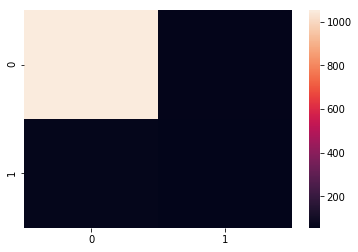

In [82]:
for i in clsfier.confusion_mtrx(y_predLDA):
    print(i)

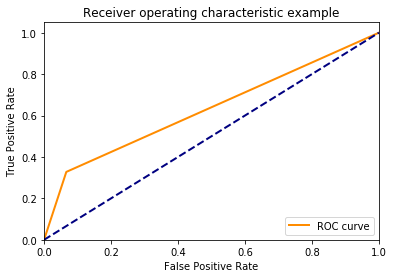

Area under curve:  0.6307207817052711


In [83]:
clsfier.AUC_ROC(y_predLDA)

---
## Clasificador Quadratic Discriminant Analysis

In [84]:
QDA = QuadraticDiscriminantAnalysis()
y_predQDA = clsfier.prediccion(QDA)

### Desempeño del clasificador

In [85]:
for i in clsfier.desempeño(y_predQDA):
    print(i, '\n')

Accuracy: 0.872168284789644 

Error: 0.12783171521035597 

              precision    recall  f1-score   support

          no       0.94      0.92      0.93      1114
         yes       0.37      0.43      0.40       122

   micro avg       0.87      0.87      0.87      1236
   macro avg       0.66      0.68      0.66      1236
weighted avg       0.88      0.87      0.88      1236
 



### Matriz de confusion

[[1025   89]
 [  69   53]]
AxesSubplot(0.125,0.125;0.62x0.755)


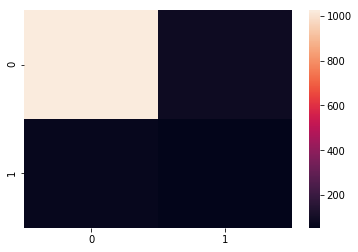

In [86]:
for i in clsfier.confusion_mtrx(y_predQDA):
    print(i)

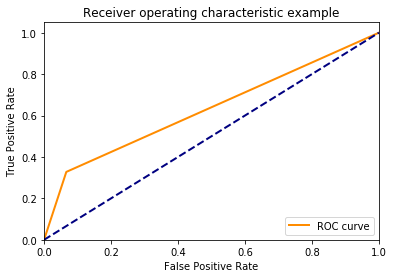

Area under curve:  0.6307207817052711


In [87]:
clsfier.AUC_ROC(y_predQDA)

# Conclusión

Random forest y RBF SVM tienen curvas ROC mas ajustada a $y=x$, y por lo tanto se comporta peor.